In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils.linear_approximator import linapx
from utils.radial_basis_approximator import rbapx
import matplotlib.gridspec as gridspec

%load_ext autoreload
%autoreload 2

# Task 3

#### Load data

In [2]:
x0 = np.loadtxt("data/nonlinear_vectorfield_data_x0.txt")
x1 = np.loadtxt("data/nonlinear_vectorfield_data_x1.txt")
dx = x1 - x0
N, n = x0.shape

## Part 1

In [3]:
dt = .1
vx = dx/dt

#### Approximate the vector field via linear regression. $\Delta t = 0.1s$

As discussed in task2, for linear approximation, value of $\Delta t$ won't influence the approxiamtion of $x_1$

In [4]:
task3part1 = linapx(x0, vx)
task3part1.coefficient

array([[-0.10016012,  0.00867272],
       [-0.00253494, -0.43267138]])

#### MSE

In [5]:
vhat = task3part1.predict()
x1_hat = x0 + vhat*dt
MSE = np.square(x1 - x1_hat).mean()
print("Mean Squared Error:", MSE)

Mean Squared Error: 0.018635040587481


## Part 2

In [10]:
task3part2 = rbapx(x0, vx)
task3part2.fit(L=300, e=2**0.5)

In [11]:
vhat = task3part2.predict()
x1_hat = x0 + vhat*dt
MSE = np.square(x1 - x1_hat).mean()
print("Mean Squared Error:", MSE)

Mean Squared Error: 1.2399127763808514e-08


## Part 3


#### Trajectories using non-linear approximator [Euler's Algorithm]

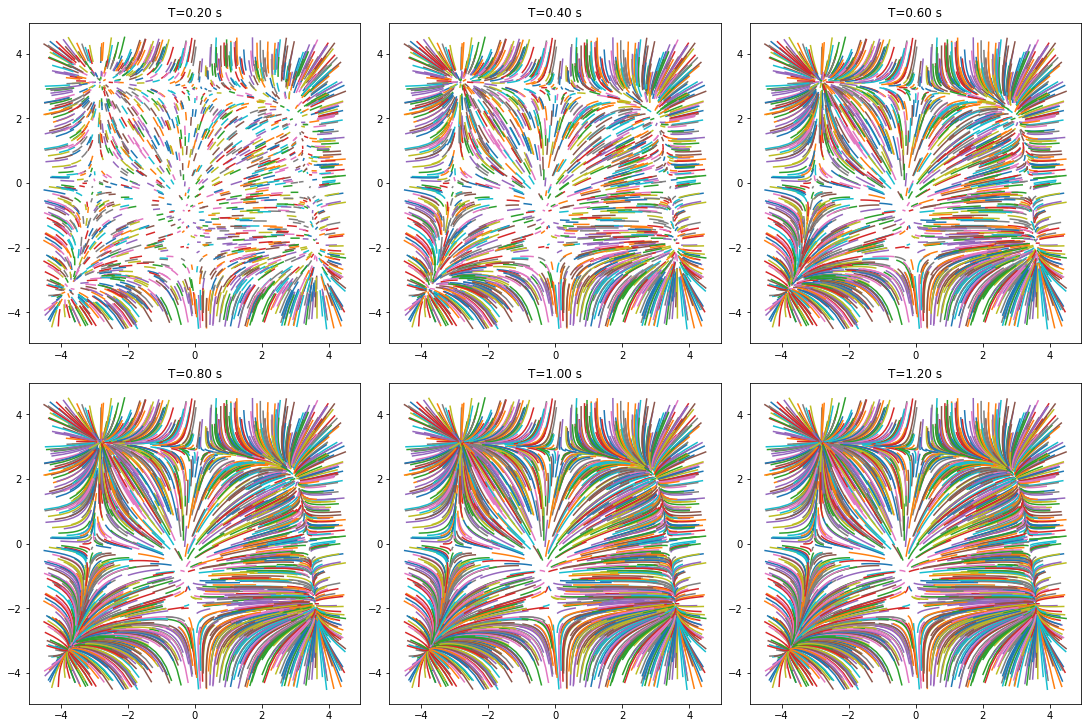

In [12]:
fig = plt.figure(constrained_layout=True, figsize=(15,10))
spec = gridspec.GridSpec(ncols=3, nrows=2, figure=fig)

for k, T_end in enumerate([0.2, 0.4, 0.6, 0.8, 1, 1.2]):
    xt = np.array([x0])
    dt = 0.1
    t = 0
    while t<T_end:
        t += dt
        xx = task3part2.predict(x=xt[-1])*dt + xt[-1]
        xx = np.array([xx])
        xt = np.append(xt, xx, axis=0)

    ax = fig.add_subplot(spec[k//3, k%3])
    N, n = x0.shape
    for i in range(N):
        x = xt[:, i, :]
        ax.plot(x[:, 0], x[:, 1])
        ax.title.set_text("T=%.2f s"%T_end)
plt.show()

##### Comments:
5 stable nodes and 4 unstable saddle points!

#### Trajectories using Linear approxiamtor

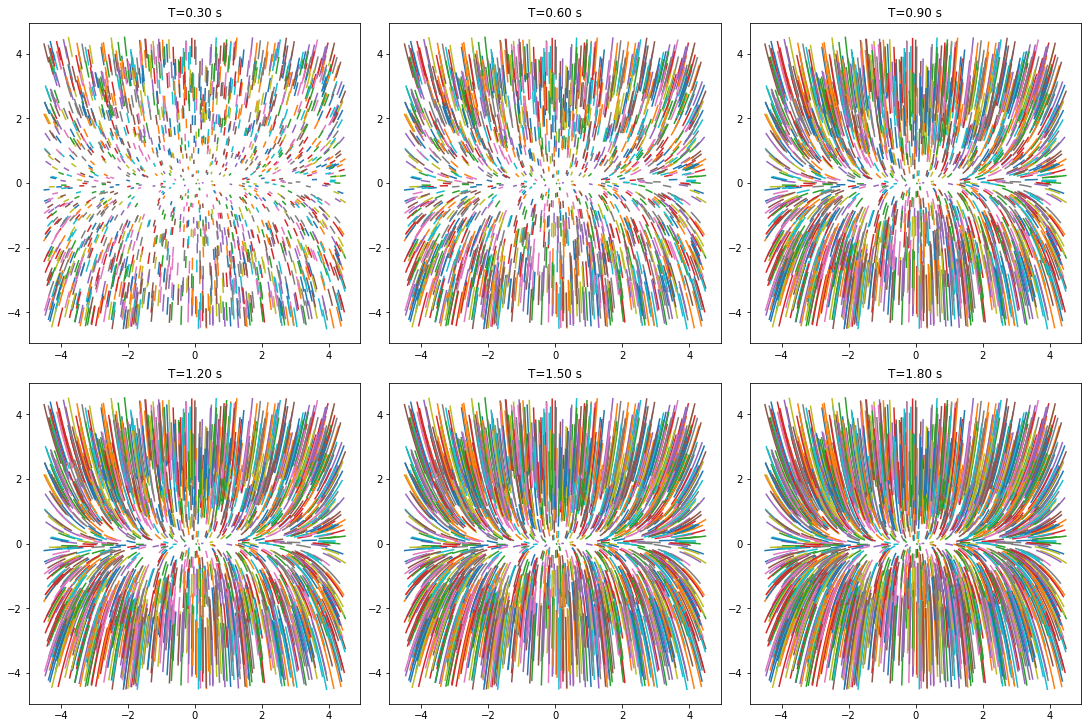

In [13]:
fig = plt.figure(constrained_layout=True, figsize=(15,10))
spec = gridspec.GridSpec(ncols=3, nrows=2, figure=fig)

for k, T_end in enumerate([0.3, 0.6, 0.9, 1.2, 1.5, 1.8]):
    xt = np.array([x0])
    dt = 0.1
    t = 0
    while t<T_end:
        t += dt
        xx = task3part1.predict(X=xt[-1])*dt + xt[-1]
        xx = np.array([xx])
        xt = np.append(xt, xx, axis=0)

    ax = fig.add_subplot(spec[k//3, k%3])
    N, n = x0.shape
    for i in range(N):
        x = xt[:, i, :]
        ax.plot(x[:, 0], x[:, 1])
        ax.title.set_text("T=%.2f s"%T_end)
plt.show()

##### Comments:
One stable node at the center.